# <font color=darkred>Laboratory 16: Probability and Simulation </font>

In [ ]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

## Full name:
## R#: 
## Title of the notebook: 
## Date: 
___

# <font color=purple>Python for Probability</font>

![](https://static.insider.com/image/5d08059fdaa48259d13213a5.jpg)

### <font color=purple>Important Terminology:</font>
 
__Experiment:__ An occurrence with an uncertain outcome that we can observe. <br>
*For example, rolling a die.*<br>
__Outcome:__ The result of an experiment; one particular state of the world. What Laplace calls a "case."<br>
*For example: 4.*<br>
__Sample Space:__ The set of all possible outcomes for the experiment.<br>
*For example, {1, 2, 3, 4, 5, 6}.*<br>
__Event:__ A subset of possible outcomes that together have some property we are interested in.<br>
*For example, the event "even die roll" is the set of outcomes {2, 4, 6}.*<br>
__Probability:__ As Laplace said, the probability of an event with respect to a sample space is the number of favorable cases (outcomes from the sample space that are in the event) divided by the total number of cases in the sample space. (This assumes that all outcomes in the sample space are equally likely.) Since it is a ratio, probability will always be a number between 0 (representing an impossible event) and 1 (representing a certain event).<br>
*For example, the probability of an even die roll is 3/6 = 1/2.*<br>

__*From https://people.math.ethz.ch/~jteichma/probability.html*__

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

## Example 1 -  Russian roulette?
>Russian roulette (Russian: русская рулетка, russkaya ruletka) is a lethal game of chance in which a player places a single round in a revolver, spins the cylinder, places the muzzle against their head, and pulls the trigger in hopes that the loaded chamber does not align with the primer percussion mechanism and the barrel, causing the weapon to discharge. Russian refers to the supposed country of origin, and roulette to the element of risk-taking and the spinning of the revolver's cylinder, which is reminiscent of a spinning roulette wheel. <br>
- Wikipedia @ https://en.wikipedia.org/wiki/Russian_roulette

![](https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/echoes-of-the-great-war-the-revolver-weston-westmoreland.jpg)

___
### Example: Simulate a game of Russian Roulette:
- For 2 rounds
- For 5 rounds
- For 10 rounds

In [20]:
import numpy as np                     #import numpy
revolver = np.array([1,0,0,0,0,0])     #create a numpy array with 1 bullet and 5 empty chambers
print(np.random.choice(revolver,2))              #randomly select a value from revolver - simulation

[1 1]


In [22]:
print(np.random.choice(revolver,5))

[1 0 0 0 1]


In [24]:
print(np.random.choice(revolver,10))

[0 0 1 0 1 0 0 0 0 0]


>A game of dafts, a game of chance <br>
One where revolver's the one to dance <br>
Rounds and rounds, it goes and spins <br>
Makes you regret all those sins <br> \
A game of fools, one of lethality  <br>
With a one to six probability <br>
There were two guys and a gun <br>
With six chambers but only one... <br> \
CLICK, one pushed the gun <br>
CLICK, one missed the fun <br>
CLICK, "that awful sound" ... <br>
BANG!, one had his brains all around! <br>

![](https://blog.uvm.edu/aivakhiv/files/2020/06/d4cawex-fd18072b-6140-48d9-93d7-0fa9435abf0e.png)

___
### Example: In a game of Russian Roulette, the chance of surviving each round is 5/6 which is almost 83%. Using a for loop, compute probability of surviving 
- For 2 rounds
- For 5 rounds
- For 10 rounds

In [4]:
nrounds =[]
probs =[]

for i in range(3):
    nrounds.append(i)
    probs.append((5/6)**i) #probability of surviving- not getting the bullet!

RRDF = pd.DataFrame({"# of Rounds": nrounds, "Probability of Surviving": probs})
RRDF

,# of Rounds,Probability of Surviving
0,0,1.000000
1,1,0.833333
2,2,0.694444


In [5]:
nrounds =[]
probs =[]

for i in range(6):
    nrounds.append(i)
    probs.append((5/6)**i) #probability of surviving- not getting the bullet!

RRDF = pd.DataFrame({"# of Rounds": nrounds, "Probability of Surviving": probs})
RRDF

,# of Rounds,Probability of Surviving
0,0,1.000000
1,1,0.833333
2,2,0.694444
3,3,0.578704
4,4,0.482253
5,5,0.401878


In [6]:
nrounds =[]
probs =[]

for i in range(11):
    nrounds.append(i)
    probs.append((5/6)**i) #probability of surviving- not getting the bullet!

RRDF = pd.DataFrame({"# of Rounds": nrounds, "Probability of Surviving": probs})
RRDF

,# of Rounds,Probability of Surviving
0,0,1.000000
1,1,0.833333
2,2,0.694444
3,3,0.578704
4,4,0.482253
5,5,0.401878
6,6,0.334898
7,7,0.279082
8,8,0.232568
9,9,0.193807


<AxesSubplot:xlabel='# of Rounds', ylabel='Probability of Surviving'>

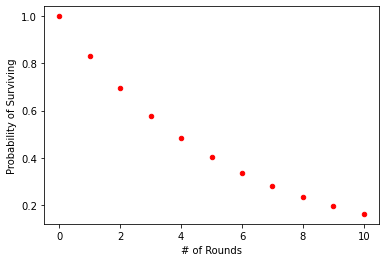

In [7]:
RRDF.plot.scatter(x="# of Rounds", y="Probability of Surviving",color="red")

## Example 2 - ### Let's Make A Deal Game Show and Monty Hall Problem 
__The Monty Hall problem is a brain teaser, in the form of a probability puzzle, loosely based on the American television game show Let's Make a Deal and named after its original host, Monty Hall. The problem was originally posed (and solved) in a letter by Steve Selvin to the American Statistician in 1975 (Selvin 1975a), (Selvin 1975b).__

>"Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?"

__*From Wikipedia: https://en.wikipedia.org/wiki/Monty_Hall_problem*__

![](http://www.bcmath.ca/m10h/The%20Monty%20Hall%20Problem%20(Web)/data/img1.png)

![](https://webstockreview.net/images/clipart-door-orange-door-3.png)

![](https://brilliant-staff-media.s3-us-west-2.amazonaws.com/tiffany-wang/UcEdvPuGYw.png)
### Example: Simulate Monty Hall Game for 1000 times. Use a barplot and discuss whether players are better off sticking to their initial choice, or switching doors? 

In [33]:
def othergoat(x):         #Define a function to return "the other goat"!
    if x == "Goat 1":
        return "Goat 2"
    elif x == "Goat 2":
        return "Goat 1"

In [35]:
Doors = np.array(["Car","Goat 1","Goat 2"])     #Define a list for objects behind the doors
goats = np.array(["Goat 1" , "Goat 2"])          #Define a list for goats!

def MHgame():
    #Function to simulate the Monty Hall Game
    #For each guess, return ["the guess","the revealed", "the remaining"]
    userguess=np.random.choice(Doors)         #randomly selects a door as userguess
    if userguess == "Goat 1":
        return [userguess, "Goat 2","Car"]
    if userguess == "Goat 2":
        return [userguess, "Goat 1","Car"]
    if userguess == "Car":
        revealed = np.random.choice(goats)
        return [userguess, revealed,othergoat(revealed)]

In [37]:
# Check and see if the MHgame function is doing what it is supposed to do:
for i in np.arange(1):
    a =MHgame()
    print(a)
    print(a[0])
    print(a[1])
    print(a[2])

['Goat 1', 'Goat 2', 'Car']
Goat 1
Goat 2
Car


In [39]:
c1 = []         #Create an empty list for the userguess
c2 = []         #Create an empty list for the revealed
c3 = []         #Create an empty list for the remaining
for i in np.arange(1000):         #Simulate the game for 1000 rounds - or any other number of rounds you desire
    game = MHgame()
    c1.append(game[0])             #In each round, add the first element to the userguess list
    c2.append(game[1])             #In each round, add the second element to the revealed list
    c3.append(game[2])             #In each round, add the third element to the remaining list


In [41]:
import pandas as pd
#Create a data frame (gamedf) with 3 columns ("Guess","Revealed", "Remaining") and 1000 (or how many number of rounds) rows
gamedf = pd.DataFrame({'Guess':c1,
                       'Revealed':c2,
                       'Remaining':c3})
gamedf

,Guess,Revealed,Remaining
0,Goat 2,Goat 1,Car
1,Goat 1,Goat 2,Car
2,Car,Goat 1,Goat 2
3,Car,Goat 2,Goat 1
4,Goat 1,Goat 2,Car
...,...,...,...
995,Car,Goat 2,Goat 1
996,Car,Goat 1,Goat 2
997,Car,Goat 1,Goat 2
998,Goat 2,Goat 1,Car


In [43]:
# Get the count of each item in the first and 3rd column
original_car =gamedf[gamedf.Guess == 'Car'].shape[0]
remaining_car =gamedf[gamedf.Remaining == 'Car'].shape[0]

original_g1 =gamedf[gamedf.Guess == 'Goat 1'].shape[0]
remaining_g1 =gamedf[gamedf.Remaining == 'Goat 1'].shape[0]

original_g2 =gamedf[gamedf.Guess == 'Goat 2'].shape[0]
remaining_g2 =gamedf[gamedf.Remaining == 'Goat 2'].shape[0]

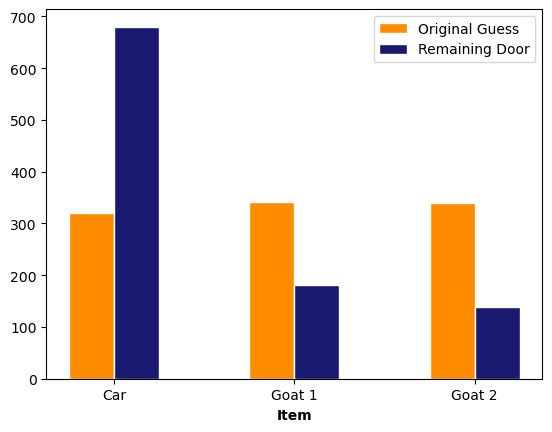

In [45]:
# Let's plot a grouped barplot
import matplotlib.pyplot as plt  

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [original_car,original_g1,original_g2]
bars2 = [remaining_car,remaining_g1,remaining_g2]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='darkorange', width=barWidth, edgecolor='white', label='Original Guess')
plt.bar(r2, bars2, color='midnightblue', width=barWidth, edgecolor='white', label='Remaining Door')
 
# Add xticks on the middle of the group bars
plt.xlabel('Item', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(bars1))], ['Car', 'Goat 1', 'Goat 2'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


<font color=crimson>__According to the plot, it is statitically beneficial for the players to switch doors because the initial chance for being correct is only 1/3__</font>
![](http://imgs.xkcd.com/comics/monty_hall.png)

___
## Example 3 - Dice 
![](https://i0.wp.com/teacherstellingtales.com/wp-content/uploads/2022/01/types_of_dice.jpg?resize=525%2C525&ssl=1)

#### 1. Simulate the results of throwing a D6 (regular dice) for 10 times. 

In [53]:
import numpy as np                     #import numpy
dice = np.array([1,2,3,4,5,6])         #create a numpy array with values of a D6
np.random.choice(dice,10)              #randomly selecting a value from dice for 10 times- simulation

array([6, 2, 4, 6, 4, 1, 1, 4, 2, 3])

#### 2. Example: What will be the probability of constantly throwing an even number with a D20 for 15 rolls

In [8]:
nrolls =[]
probs =[]

for i in range(1,16,1):
    nrolls.append(i)
    probs.append((1/2)**i) #probability of throwing an even number-10/20 or 1/2
DRDF = pd.DataFrame({"# of Rolls": nrolls, "Probability of constantly throwing an even number": probs})
DRDF

,# of Rolls,Probability of constantly throwing an even number
0,1,0.500000
1,2,0.250000
2,3,0.125000
3,4,0.062500
4,5,0.031250
5,6,0.015625
6,7,0.007812
7,8,0.003906
8,9,0.001953
9,10,0.000977


<AxesSubplot:xlabel='# of Rolls', ylabel='Probability of constantly throwing an even number'>

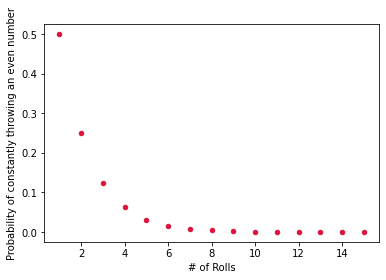

In [9]:
DRDF.plot.scatter(x="# of Rolls", y="Probability of constantly throwing an even number",color="crimson")

#### 3. Example: What will be the probability of throwing at least one 6 with a D6 for 20 rolls make a scatter plot for this one!

In [66]:
nRolls =[]
probs =[]
for i in range(1,21,1):
    nRolls.append(i)
    probs.append(1-(5/6)**i) #probability of at least one 6: 1-(5/6)
rollsDF = pd.DataFrame({"# of Rolls": nRolls, "Probability of rolling at least one 6": probs})
rollsDF

,# of Rolls,Probability of rolling at least one 6
0,1,0.166667
1,2,0.305556
2,3,0.421296
3,4,0.517747
4,5,0.598122
5,6,0.665102
6,7,0.720918
7,8,0.767432
8,9,0.806193
9,10,0.838494


<AxesSubplot:xlabel='# of Rolls', ylabel='Probability of rolling at least one 6'>

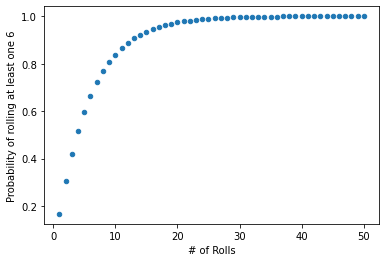

In [16]:
rollsDF.plot.scatter(x="# of Rolls", y="Probability of rolling at least one 6")

#### 4. Assume the following rules:
- If the dice shows 1 or 2 spots, my net gain is -1 dollar.
- If the dice shows 3 or 4 spots, my net gain is 0 dollars.
- If the dice shows 5 or 6 spots, my net gain is 1 dollar.<br>
__Define a function to simulate a game with the above rules, assuming a D6, and compute the net gain of the player over any given number of rolls. <br>
Compute the net gain for 500 rolls__

In [79]:
def D6game(nrolls):
    import numpy as np                     #import numpy
    dice = np.array([1,2,3,4,5,6])         #create a numpy array with values of a D6
    rolls = np.random.choice(dice,nrolls)  #randomly selecting a value from dice for nrolls times- simulation
    gainlist =[]                           #create an empty list for gains|losses
    for i in np.arange(len(rolls)):        #Apply the rules 
        if rolls[i]<=2:
            gainlist.append(-1)
        elif rolls[i]<=4:
            gainlist.append(0)
        elif rolls[i]<=6:
            gainlist.append(+1)
    return (np.sum(gainlist))              #sum up all gains|losses
#   return (gainlist,"The net gain is equal to:",np.sum(gainlist))
D6game(500)

10

#### 5. Simulate the probability of rolling a number greater than 10 in 10000 simulations

In [88]:
import numpy as np
def DiceRoll1(nSimulation):
    count =0
    dice = np.array([1,2,3,4,5,6])         #create a numpy array with values of a D6
    for i in range(nSimulation):
        die1 = np.random.choice(dice,1)    #randomly selecting a value from dice - throw the D6 once
        die2 = np.random.choice(dice,1)    #randomly selecting a value from dice - throw the D6 once again!
        score = die1 + die2                #summing them up
        if score > 10:                     #if it meets our desired condition:
            count +=1                      #add one to the "count"
    return count/nSimulation               #compute the probability of the desired event by dividing count by the total number of trials

nSimulation = 10000
print("The probability of rolling a number greater than 10 after",nSimulation,"rolld is:",DiceRoll1(nSimulation)*100,"%")

The probability of rolling a number greater than 10 after 10000 rolld is: 8.23 %


#### 6. Simulate the probability of rolling a number greater than 7 and is even in 10000 simulations

In [94]:
import numpy as np
def DiceRoll2(nSimulation):
    count =0
    dice = np.array([1,2,3,4,5,6])         #create a numpy array with values of a D6
    for i in range(nSimulation):
        die1 = np.random.choice(dice,1)    #randomly selecting a value from dice - throw the D6 once
        die2 = np.random.choice(dice,1)    #randomly selecting a value from dice - throw the D6 once again!
        score = die1 + die2
        if score %2 ==0 and score > 7:      #the total score is even and greater than 7
            count +=1
    return count/nSimulation

nSimulation = 10000
print("The probability of rolling an even number and greater than 7 after",nSimulation," rolls is:",DiceRoll2(nSimulation)*100,"%")

The probability of rolling an even number and greater than 7 after 10000  rolls is: 24.33 %


### 7. - Bag of balls
![](https://www.ohnuts.com/noapp/showImage.cfm/medium/xmas%20gumballs.jpg)

An urn contains 10 white balls, 20 reds and 30 greens. We want to draw 5 balls with replacement. Use a simulation (10000 trials) to find the estimated probability that:
- we draw 3 white and 2 red balls
- we draw 5 balls of the same color


__This problem is designed based on an example by *Elliott Saslow*
from Medium.com, accessible @ *https://medium.com/future-vision/simulating-probability-events-in-python-5dd29e34e381*__

In [103]:
import numpy as np
import random
d = {}
for i in range(0,60,1):
    if i <10:
        d[i]="White"
    elif i>9 and i<30:
        d[i]="Red"
    else:
        d[i]="Green"
#
nSimulation= 10000
outcome1= 0
outcome2= 0         #we can consider multiple desired outcomes


for i in range(nSimulation):
    draw=[]
    for i in range(5):
        draw.append(d[random.randint(0,59)])
    drawarray = np.array(draw)
    white = sum(drawarray== "White")
    red = sum(drawarray== "Red")
    green = sum(drawarray== "Green")
    if white ==3 and red==2:
        outcome1 +=1
    if white ==5 or red==5 or green==5:
        outcome2 +=1

print("The probability of drawing 3 white and 2 red balls is",(outcome1/nSimulation)*100,"%")
print("The probability of drawing 5 balls of the same color is",(outcome2/nSimulation)*100,"%")


The probability of drawing 3 white and 2 red balls is 0.38999999999999996 %
The probability of drawing 5 balls of the same color is 3.4799999999999995 %


### Exercise 15.0 (100 Marks)
1. Risk or Probability - Are they the same? Are they different? Discuss your opinion. 

2. Write a function to find the probability of an event in percentage form based on given outcomes and sample space

3.  Using a standard deck of cards and the function in Question 2- 
    1. Compute the probability of drawing the King of Hearts.
    2. Compute the probability of drawing an ace after drawing a king.
    3. Compute the probability of drawing a Royal Flush <br>
*hint: (in poker) a straight flush including ace, king, queen, jack, and ten all in the same suit, which is the hand of the highest possible value

__This problem is designed based on an example by *Daniel Poston* from DataCamp, accessible @ *https://www.datacamp.com/community/tutorials/statistics-python-tutorial-probability-1*__

4. What is the probability of drawing an ace at least once (with replacement) in 20 tries - make a scatter plot.

### For Question 5-7
> #### You go to a market to pick out some gourds to decorate your house for Halloween. The market has a special October deal where you get 3 randomly chosen gourdss for $10. Each gourd can either be an orange pumpkin, a green pumpkin or a squash. The probabilities for picking each one of them are: P(orange pumpkin) = 0.6, P(green pumpkin) = 0.3, and P(squash) = 0.1.

5. What is the probability that the first gourd is an orange pumpkin, the second is a green pumpkin, and the third is a squash?

6. What is the probability that you get no squashes?

7. What is the probability that you get at least one orange pumpkin?

8. Marbles: G, G, G, G, R, R, R, B, B, Y. 
   What is the Probability we draw 4 G at random **with** replacement.


9. Marbles: G, G, G, G, R, R, R, B, B, Y.
   What is the Probability when we draw 4 letters, we get at least 1 G when at random **with** replacement.


10. Drawing 6 Balls  <br>
An urn contains 20 white balls, 30 reds and 50 greens. We want to draw 6 balls with replacement. Use a simulation (10000 trials) to find the estimated probability that: we draw 1 white balls, 2 red balls and 3 green balls.

___
![](https://media2.giphy.com/media/5nj4ZZWl6QwneEaBX4/source.gif) <br>

*Here are some of the resources used for creating this notebook:* 


- __"Poker Probability and Statistics with Python"__ by __Daniel Poston__ available at *https://www.datacamp.com/community/tutorials/statistics-python-tutorial-probability-1*<br>
- __"Simulating probability events in Python"__ by __Elliott Saslow__ available at *https://medium.com/future-vision/simulating-probability-events-in-python-5dd29e34e381*<br>


*Here are some great reads on this topic:* 
- __"Simulate the Monty Hall Problem Using Python"__ by __randerson112358__ available at *https://medium.com/swlh/simulate-the-monty-hall-problem-using-python-7b76b943640e* <br>
- __"The Monty Hall problem"__ available at *https://scipython.com/book/chapter-4-the-core-python-language-ii/examples/the-monty-hall-problem/*<br>
- __"Introduction to Probability Using Python"__ by __Lisandra Melo__ available at *https://medium.com/future-vision/simulating-probability-events-in-python-5dd29e34e381* <br>
- __"Introduction to probability and statistics for Data Scientists and machine learning using python : Part-1"__ by __Arun Singh__ available at *https://medium.com/@anayan/introduction-to-probability-and-statistics-for-data-scientists-and-machine-learning-using-python-377a9b082487*<br>

*Here are some great videos on these topics:* 
- __"Monty Hall Problem - Numberphile"__ by __Numberphile__ available at *https://www.youtube.com/watch?v=4Lb-6rxZxx0* <br>
- __"The Monty Hall Problem"__ by __D!NG__ available at *https://www.youtube.com/watch?v=TVq2ivVpZgQ* <br>
- __"21 - Monty Hall - PROPENSITY BASED THEORETICAL MODEL PROBABILITY - MATHEMATICS in the MOVIES"__ by __Motivating Mathematical Education and STEM__ available at *https://www.youtube.com/watch?v=iBdjqtR2iK4* <br>
- __"The Monty Hall Problem"__ by __niansenx__ available at *https://www.youtube.com/watch?v=mhlc7peGlGg* <br>
- __"The Monty Hall Problem - Explained"__ by __AsapSCIENCE__ available at *https://www.youtube.com/watch?v=9vRUxbzJZ9Y* <br>
- __"Introduction to Probability | 365 Data Science Online Course"__ by __365 Data Science__ available at *https://www.youtube.com/watch?v=soZRfdnkUQg* <br>
- __"Probability explained | Independent and dependent events | Probability and Statistics | Khan Academy"__ by __Khan Academy__ available at *https://www.youtube.com/watch?v=uzkc-qNVoOk* <br>
- __"Math Antics - Basic Probability"__ by __mathantics__ available at *https://www.youtube.com/watch?v=KzfWUEJjG18* <br>

___
![](https://media.csesoc.org.au/content/images/2019/10/learn11.gif) <br>


![](https://quotefancy.com/media/wallpaper/1600x900/2256690-Pierre-Simon-Laplace-Quote-Probability-theory-is-nothing-but.jpg)